# 1. Configuración Inicial

In [1]:
# Frase objetivo
target_phrase = "to be or not to be"
# Tamaño máximo de la población
max_population = 1000
# Tasa de mutación (en porcentaje)
mutation_rate = 1  # Empezaremos con 1%, pero este valor puede ser modificado más adelante

target_phrase, max_population, mutation_rate


('to be or not to be', 1000, 1)

# 2. Inicialización de la Población

In [2]:
import random
import string

def generate_random_sequence(length: int) -> str:
    """Genera una secuencia aleatoria de caracteres de la longitud dada."""
    return ''.join(random.choice(string.ascii_lowercase + ' ') for _ in range(length))

def initialize_population(target_phrase: str, max_population: int) -> list:
    """Inicializa una población de secuencias aleatorias."""
    return [generate_random_sequence(len(target_phrase)) for _ in range(max_population)]

# Inicializar la población
population = initialize_population(target_phrase, max_population)

# Mostrar las primeras 5 secuencias de la población inicial
population[:5]


['fstdwwrmgochddw dn',
 'cznggrqqrwzmljhrnc',
 'zrlxxosquyoetguotw',
 'ctq ihypxjmbobbzfr',
 'gvjwbjbtgsqiuhdnog']

# 3. Ejecución del Algoritmo 

In [3]:
def fitness(sequence: str, target: str) -> int:
    """Calcula la aptitud de una secuencia comparándola con la frase objetivo."""
    return sum(1 for c1, c2 in zip(sequence, target) if c1 == c2)

def selection(population: list, target: str) -> list:
    """Selecciona individuos de la población basados en su aptitud."""
    # Calcular la aptitud de cada individuo
    scored_population = [(individual, fitness(individual, target)) for individual in population]
    
    # Ordenar la población basada en aptitud
    scored_population.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionar la mitad superior de individuos
    selected_population = [individual for individual, _ in scored_population[:len(scored_population)//2]]
    
    return selected_population

# Probar la función de selección
selected_population = selection(population, target_phrase)

# Mostrar las primeras 5 secuencias seleccionadas
selected_population[:5]

def crossover(parent1: str, parent2: str) -> str:
    """Realiza un cruce entre dos secuencias para generar un hijo."""
    # Punto de corte aleatorio
    cut = random.randint(0, len(parent1) - 1)
    # Crear al hijo combinando las partes de los padres basadas en el punto de corte
    child = parent1[:cut] + parent2[cut:]
    return child

def reproduction(selected_population: list) -> list:
    """Genera una nueva población cruzando individuos seleccionados."""
    new_population = []
    for _ in range(max_population):
        parent1 = random.choice(selected_population)
        parent2 = random.choice(selected_population)
        child = crossover(parent1, parent2)
        new_population.append(child)
    return new_population


In [4]:
# Probar la función de reproducción
new_population = reproduction(selected_population)

# Mostrar las primeras 5 secuencias de la nueva población
new_population[:5]


['icsoedkjbohynvjexw',
 'cwlui fpwiafjszrqu',
 'uoqvnufnuoagpj ufl',
 ' mkli jkahni siqpb',
 'zokenpd aanpotcfmp']

In [5]:
def mutate(sequence: str, mutation_rate: int) -> str:
    """Aplica mutaciones aleatorias a una secuencia basadas en la tasa de mutación."""
    mutated_sequence = ''
    for char in sequence:
        if random.randint(1, 100) <= mutation_rate:
            mutated_sequence += generate_random_sequence(1)
        else:
            mutated_sequence += char
    return mutated_sequence

def apply_mutation(population: list, mutation_rate: int) -> list:
    """Aplica mutaciones a la población."""
    return [mutate(sequence, mutation_rate) for sequence in population]

# Probar la función de mutación
mutated_population = apply_mutation(new_population, mutation_rate)

# Mostrar las primeras 5 secuencias mutadas
mutated_population[:5]


def genetic_algorithm(target_phrase: str, max_population: int, mutation_rate: int, max_generations=1000) -> tuple:
    """Implementa el algoritmo genético para evolucionar hacia la frase objetivo."""
    # Inicializar población
    population = initialize_population(target_phrase, max_population)
    generations = 0
    best_sequence = ""
    best_fitness = 0
    
    # Registro del progreso
    progress = []

    for _ in range(max_generations):
        # Selección
        selected_population = selection(population, target_phrase)
        # Reproducción
        new_population = reproduction(selected_population)
        # Mutación
        mutated_population = apply_mutation(new_population, mutation_rate)
        # Sustitución
        population = mutated_population
        
        # Encontrar la secuencia con la mejor aptitud en la población actual
        current_best_sequence = max(population, key=lambda x: fitness(x, target_phrase))
        current_best_fitness = fitness(current_best_sequence, target_phrase)
        
        # Registrar el progreso
        progress.append(current_best_sequence)
        
        if current_best_fitness > best_fitness:
            best_sequence = current_best_sequence
            best_fitness = current_best_fitness

        # Verificar si hemos alcanzado la frase objetivo
        if best_sequence == target_phrase:
            generations = _ + 1
            break
        generations = _ + 1

    return best_sequence, generations, progress

# Ejecutar el algoritmo genético
best_sequence, generations, progress = genetic_algorithm(target_phrase, max_population, mutation_rate)

best_sequence, generations

('to be or not to be', 19)

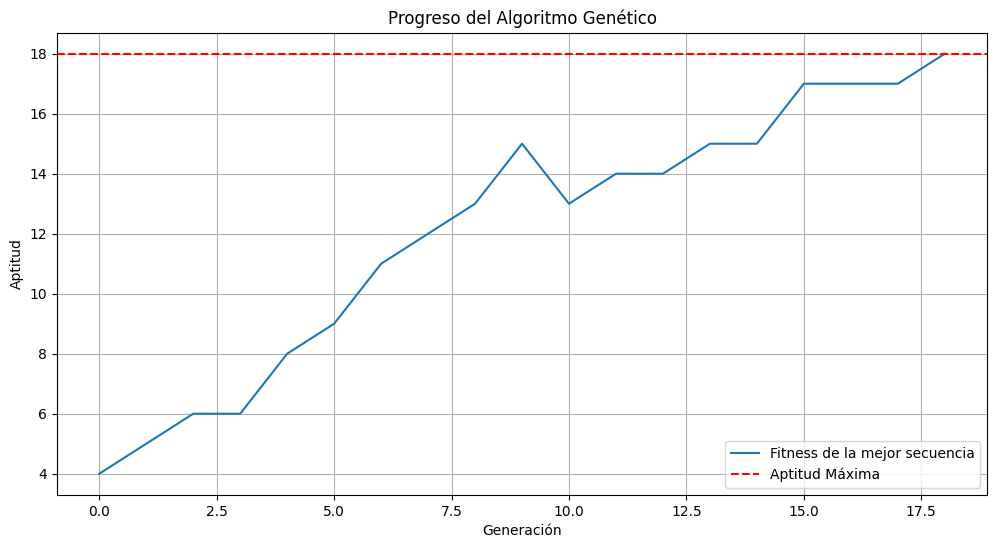

In [6]:

import matplotlib.pyplot as plt

def visualize_progress(progress: list, target_phrase: str):
    """Visualiza el progreso del algoritmo genético en cada generación."""
    fitness_scores = [fitness(sequence, target_phrase) for sequence in progress]
    
    plt.figure(figsize=(12, 6))
    plt.plot(fitness_scores, label='Fitness de la mejor secuencia')
    plt.xlabel('Generación')
    plt.ylabel('Aptitud')
    plt.title('Progreso del Algoritmo Genético')
    plt.axhline(y=len(target_phrase), color='r', linestyle='--', label='Aptitud Máxima')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizar el progreso
visualize_progress(progress, target_phrase)
